<a href="https://colab.research.google.com/github/SilahicAmil/30-Days-Of-ML/blob/main/Day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribution Plots

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Import Data

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


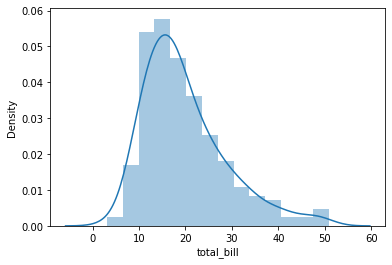

In [6]:
sns.distplot(tips["total_bill"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


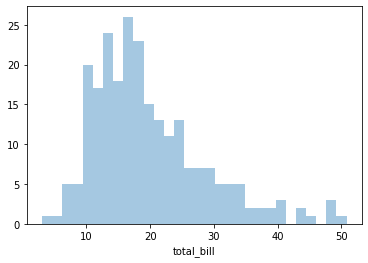

In [5]:
sns.distplot(tips['total_bill'],kde=False,bins=30);

## Jointplot

Allwos you to match up two distplots for bivariate data. Many choices of parameters to compare

* Scatter
* Reg
* Resid
* KDE
* Hex

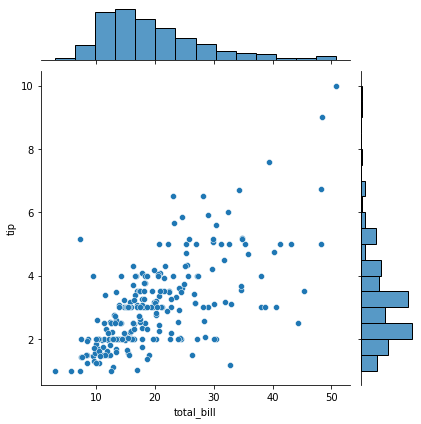

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter');

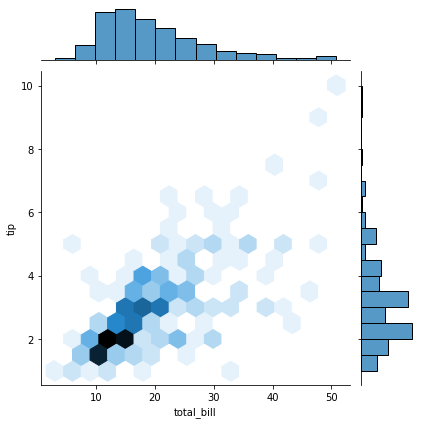

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex');

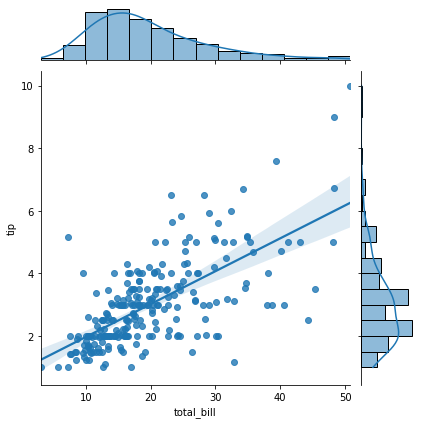

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg');

## Pairplot

Plot pairwise relationships across and entire dataframe for numerical columns. For categorical columns there is a color hue argument

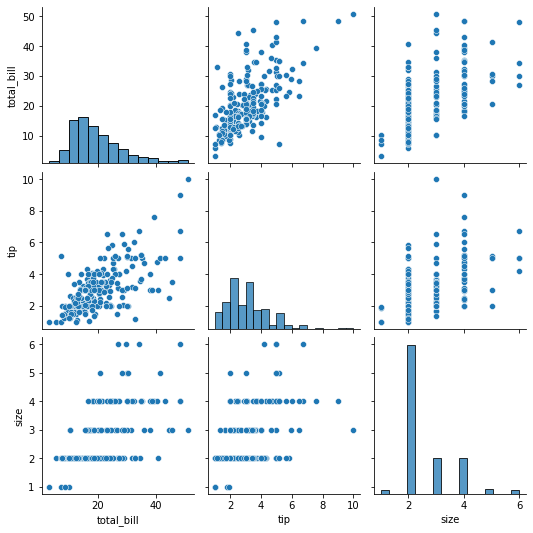

In [12]:
sns.pairplot(tips);

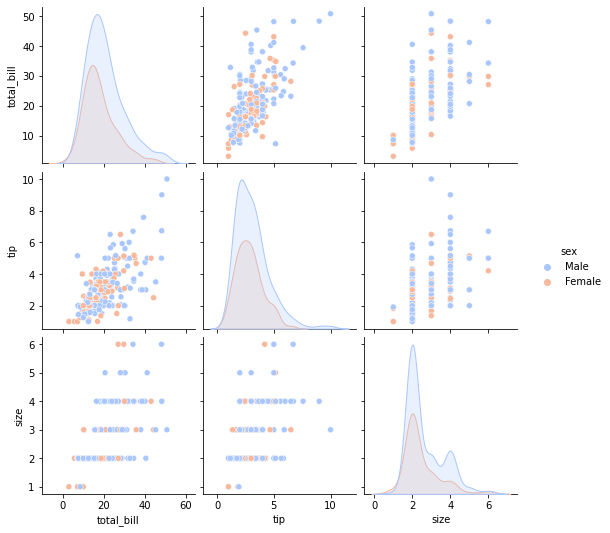

In [13]:
sns.pairplot(tips,hue='sex',palette='coolwarm');

## Rugplot

Rugplots draw a dash mark for every point on a univariate distribution. Building block of KDE plots

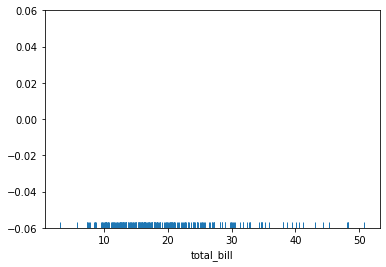

In [15]:
sns.rugplot(tips['total_bill']);

## KDEplot

Kernal Density Estimation plots. These type of KDE plots replace every observation with a Gaussian distribution centered around the value.

(0.0, 1.0)

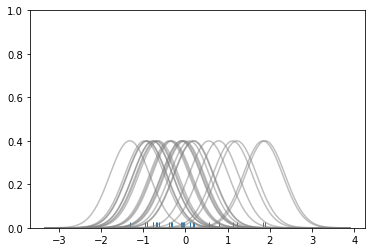

In [18]:
#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of Basis Functions')

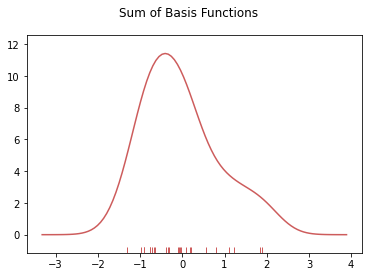

In [20]:
# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Set title
plt.suptitle("Sum of Basis Functions")

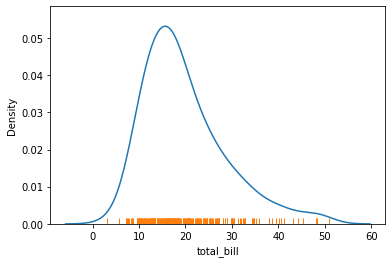

In [22]:
sns.kdeplot(tips['total_bill']);
sns.rugplot(tips['total_bill']);

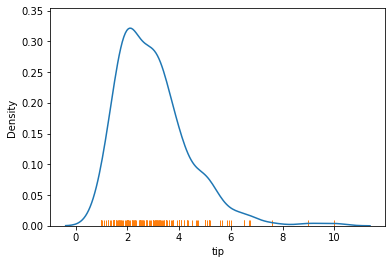

In [24]:
sns.kdeplot(tips['tip']);
sns.rugplot(tips['tip']);